<a href="https://colab.research.google.com/github/tanmay023/GREEN-SKILL-AND-AI/blob/main/waste_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tanmayshambharkar123","key":"22532b995bdf14d28889fed4a01a3e33"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d techsash/waste-classification-data

Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
 95% 407M/427M [00:02<00:00, 116MB/s]
100% 427M/427M [00:02<00:00, 166MB/s]


In [5]:
!unzip waste-classification-data.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5511.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5512.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5513.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5514.jpg  
  i

In [38]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [40]:
train_dir = '/content/dataset/DATASET/TRAIN'
test_dir = '/content/dataset/DATASET/TEST'

In [45]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 22564 images belonging to 2 classes.


In [46]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 2513 images belonging to 2 classes.


In [50]:
model = Sequential([
    Conv2D(60, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1 , activation='sigmoid')
])

In [51]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 148, 148, 60)   │         1,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 74, 74, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 72, 72, 32)     │        17,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     2,367,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,405,233 (9.18 MB)

 Trainable params: 2,405,233 (9.18 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [54]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator
)

Epoch 1/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 144s 203ms/step - accuracy: 0.7850 - loss: 0.4799 - val_accuracy: 0.8735 - val_loss: 0.3421
Epoch 2/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 142s 200ms/step - accuracy: 0.8285 - loss: 0.4078 - val_accuracy: 0.8794 - val_loss: 0.3128
Epoch 3/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 140s 198ms/step - accuracy: 0.8396 - loss: 0.3747 - val_accuracy: 0.8747 - val_loss: 0.3097
Epoch 4/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 139s 197ms/step - accuracy: 0.8433 - loss: 0.3699 - val_accuracy: 0.8874 - val_loss: 0.2988
Epoch 5/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 142s 201ms/step - accuracy: 0.8556 - loss: 0.3458 - val_accuracy: 0.8918 - val_loss: 0.2814


In [55]:
loss, accuracy = model.evaluate(test_generator)
print(f'Accuracy:{accuracy*100:.2f}%')

79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.8925 - loss: 0.2745
Accuracy:89.18%


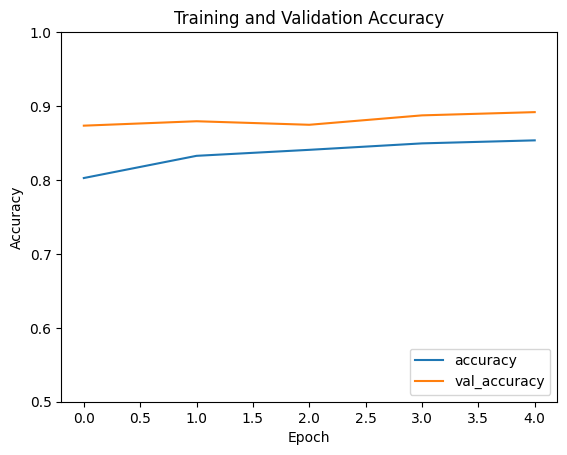

In [56]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

In [57]:
model.save('WASTE_CLASSIFICATION_89%.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')